<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
#import kaggle

%matplotlib inline

In [88]:
url='http://yustiks.ru/dataset/creditcard.csv'
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

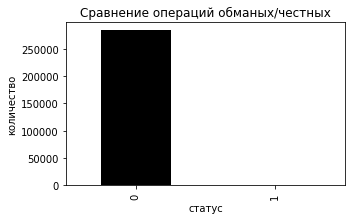

In [7]:
data['Class'].value_counts(dropna = False).plot.bar(color = 'black', figsize = (5, 3))

plt.title('Сравнение операций обманых/честных')
plt.xlabel('статус')
plt.ylabel('количество')
plt.show()

количество обманных сделок -  492 , количество честных -  284315


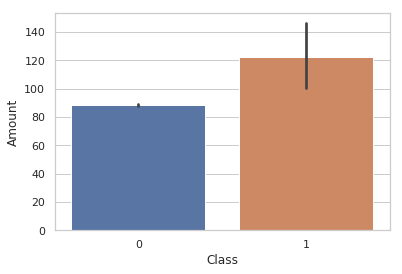

In [8]:
set1 = data[data['Class']==1]
set2 = data[data['Class']==0]

sns.set(style="whitegrid")
ax = sns.barplot(x = 'Class', y = 'Amount', data=data)
print('количество обманных сделок - ',set1.shape[0] ,', количество честных - ',set2.shape[0])

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

***Сразу обращем внимание, что Датасет не сбалансированный, так как обманных операций крайне мало !!!***

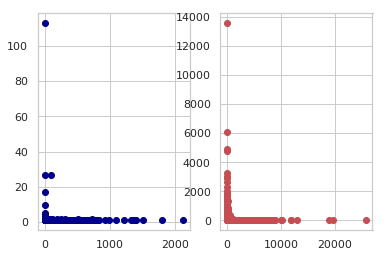

In [9]:
fig = plt.figure()

subplot = fig.add_subplot(1, 2, 1)
x ,y = np.unique(set1['Amount'],return_counts=True)
subplot.scatter(x, y, c='DarkBlue')

subplot = fig.add_subplot(1, 2, 2)
x ,y = np.unique(set2['Amount'],return_counts=True)
subplot.scatter(x, y, c='r')


**5. Построить графики histograms для всех значений**

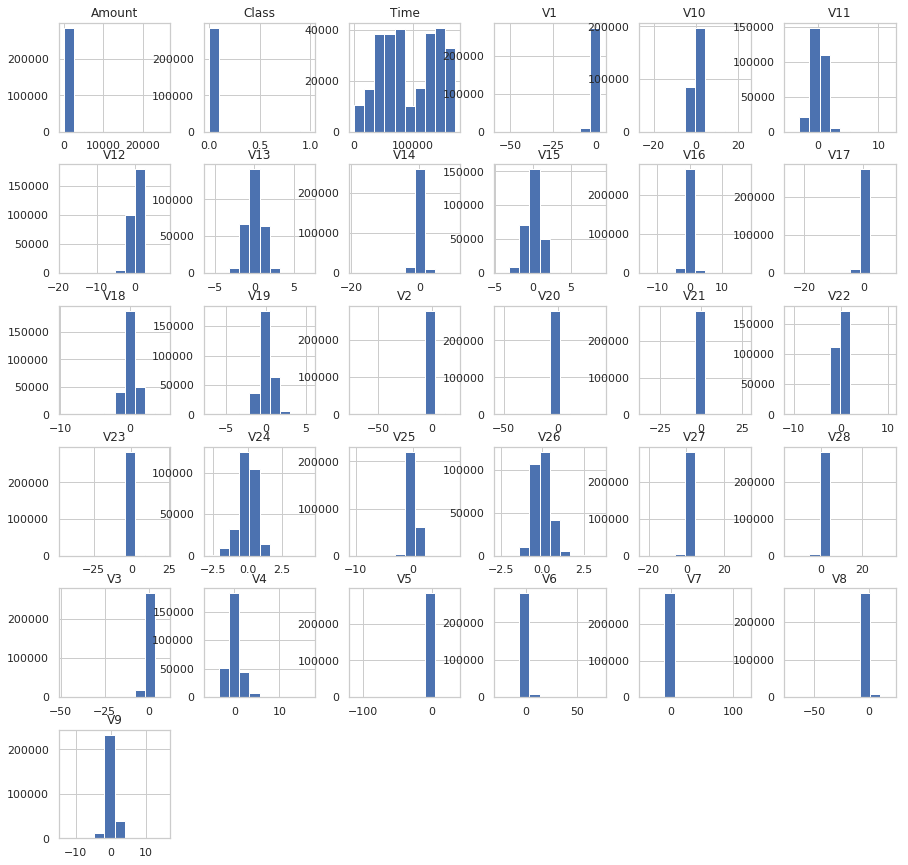

In [10]:
data.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [0]:
headers = list(data.columns.values)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers


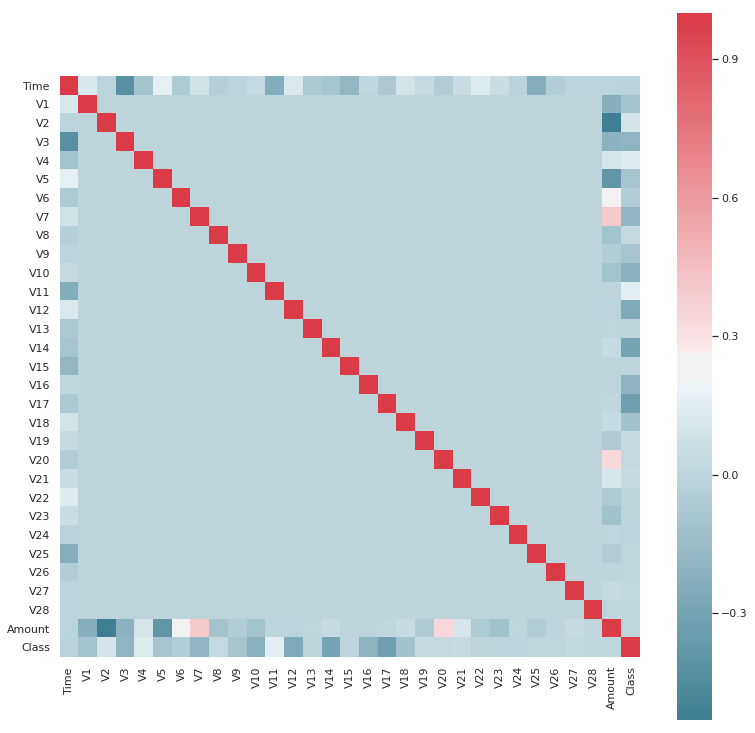

In [12]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

из матрицы коррелляции видим колонки имеющие самую большую коррелляцию на Class V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V4        0.133447
V11       0.154876

**7. Выбрать несколько элементов исходя из матрицы корреляций для предсказания таргет значения Class. Построить модель линейной регрессии. Разделить датасет на 80% тренировочных данных и 20% тестовых данных. Для fit метода использовать тренировочные данные, проверить качество модели на тестовых данных. Почему модель дает такой результат?**

Для разделения на тренировочный датасет и тестовый датасет можно использовать функцию  из sklearn:

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [0]:
col_train = {'V17', 'V14', 'V12', 'V10', 'V3', 'V7','V4', 'V11'}
X = df_norm[col_train]
y =  df_norm['Class']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [0]:
def mod_norm(x):
  if x < 0:
    return -1
  else:
    return 1

Делаем оценку точности модели по Precision and recall так как в неравных классах Accuracy не работает

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

model = LinearRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)
model_norm = [mod_norm(x) for x in model_pred]
 

# переведем данные предикт в ска

print(classification_report(y_test, model_norm))


              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56861
         1.0       0.81      0.30      0.43       101

    accuracy                           1.00     56962
   macro avg       0.90      0.65      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
model.score(X_test, y_test)

0.4348809119050092

***Обманные сделки угадываются с точностью 81%, при этом 70% Обманных сделок на самом деле Честные.Модель дает точность предсказаний 43%, так как мы использовали Линейную регрессию, здесь лучше подойдет Дерево решений и мало данных по обманным операциям***

In [12]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model_d=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_d.fit(X_train, y_train)

print('score модели  - ', model_d.score(X_test, y_test))
model_pred = model_d.predict(X_test)

model_norm = [mod_norm(x) for x in model_pred]
print(classification_report(y_test, model_norm))

score модели  -  0.9995435553526912
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56861
         1.0       0.93      0.80      0.86       101

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



***Дерево решений дает точность 99%, но только из-за несбалансированного сета. Также точность угадывания Обманных операций значительно выше, 93% обманных операций распознаютс якак обманные, при этои только 20% честных операций предполагаются моделью как обманные.***

**8. Чтобы уравновесить датасет по классу Class, выберем одинаковое количество элементов из датасета по классу.** Необходимо посчитать минимальное количество (N) элементов, посчитанное в задаче 3. Выбрать N элементов рандомно из класса, имеющего бОльшее количество элементов, и все элементы из класса имеющего меньшее количество. Таким образом, мы уравновесим датасет по количеству элементов. Смоделировать линейную регрессию на полученном датасете. Посчитать качество модели. Получилось ли улучшить модель? Если да, то засчет чего?

In [13]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
ros = RandomUnderSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_sample(X, y)
print('Количество элементов до операции:', len(X))
print('Количество элементов после операции:', len(X_resampled))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Количество элементов до операции: 284807
Количество элементов после операции: 984


In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2, random_state = 0)

model = LinearRegression()
result = model.fit(X_train, y_train)

print('intercept:', model.intercept_)

print('slope:', model.coef_)
print('качество модели после ресэмплинга ',model.score(X_test, y_test))

model_pred = model.predict(X_test)
model_norm = [mod_norm(x) for x in model_pred]
print(classification_report(y_test, model_norm))


intercept: 0.38944761503204767
slope: [ 0.34477284 -1.92560632  0.42550376 -0.26395596 -0.84653835  1.0354278
 -0.02069022  0.09491368]
качество модели после ресэмплинга  0.5718765910005033
              precision    recall  f1-score   support

        -1.0       0.78      0.99      0.87        91
         1.0       0.99      0.75      0.86       106

    accuracy                           0.86       197
   macro avg       0.88      0.87      0.86       197
weighted avg       0.89      0.86      0.86       197



***Качество модели улучшилось на 30%. два сета обманных и честных операций уравновешены. 78% чесных операций предсказываются честными. 99% обманных операций - предсказываются обманными !!!. 25 честных операций предсказываются обманными.*** 

In [15]:
from sklearn.ensemble import RandomForestClassifier

model_d=RandomForestClassifier(n_estimators=100)

# обучаем модель
model_d.fit(X_train, y_train)

print('score модели  - ', model_d.score(X_test, y_test))
model_pred = model_d.predict(X_test)

model_norm = [mod_norm(x) for x in model_pred]
print(classification_report(y_test, model_norm))

score модели  -  0.9137055837563451
              precision    recall  f1-score   support

        -1.0       0.87      0.96      0.91        91
         1.0       0.96      0.88      0.92       106

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197



***Дерево решений дает все же большую точность ...  ***

**9. Построить boxplot графики для 4ех негативно коррелирующих элементов и 4 позитивно коррелирующих элементов для полученного в шаге 8 датасете.** Пример boxplot:

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])

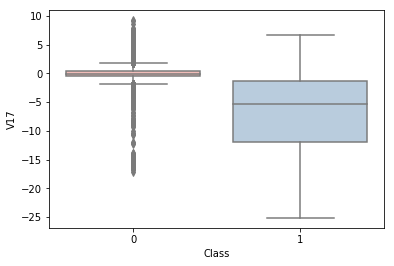

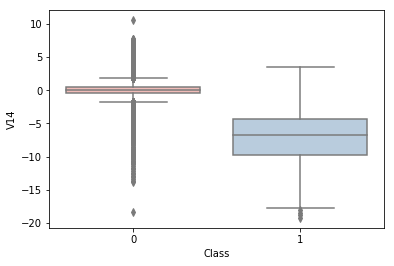

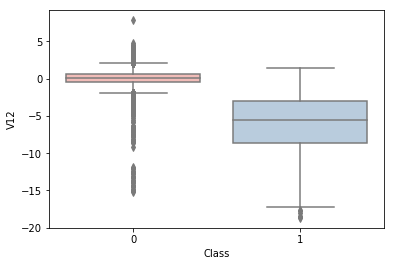

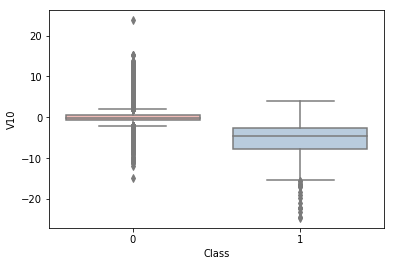

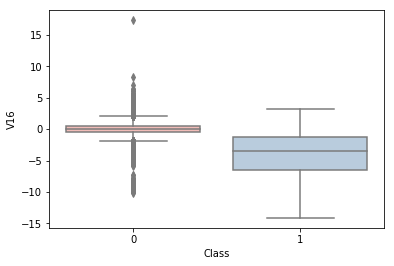

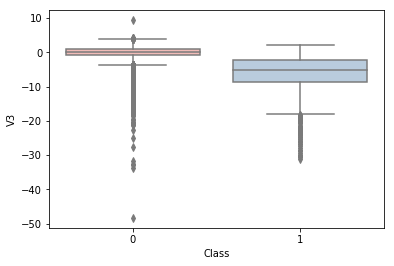

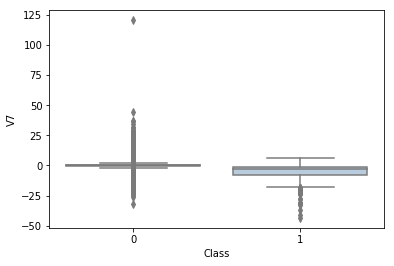

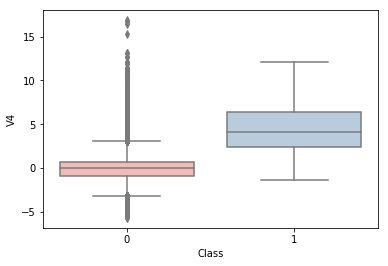

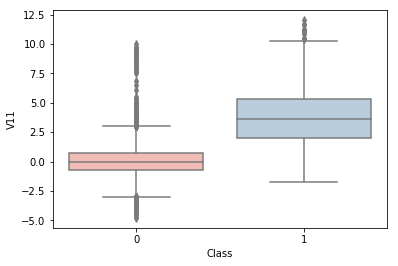

In [34]:
# V17 -0.326481 V14 -0.302544 V12 -0.260593 V10 -0.216883 V16 -0.196539 V3 -0.192961 V7 -0.187257 V4 0.133447 V11 0.154876
fig = plt.figure()
sns.boxplot(x="Class", y="V17", data=data, palette='Pastel1')
plt.show()

sns.boxplot(x="Class", y="V14", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V12", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V10", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V16", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V3", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V7", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V4", data=data, palette='Pastel1')
plt.show()
sns.boxplot(x="Class", y="V11", data=data, palette='Pastel1')
plt.show()

**10. Из графиков, полученных на предыдущем шаге, убрать выбросы методом выборки элементов из интерквартильного интервала (взять только те элементы, которые находятся квартилем 0.25 и квартилем 0.75).** Посчитать качество модели и сравнить с предыдущим. Получилось ли улучшить модель? Почему?

In [0]:
def DeleteVibros( low, high ,data_v, col_res):
  filt_df = data_v.loc[:, data_v.columns != col_res]
  
  # убираем из данных выбросы, все значения не попадающие в квартиль 0,25
  quant_df = filt_df.quantile([low, high])
  
  filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)
  filt_df = pd.concat([df_norm.loc[:,col_res], filt_df], axis=1)
  return filt_df.dropna()
  

In [109]:
col_train = {'V17', 'V14', 'V12', 'V10', 'V3', 'V7','V4', 'V11', 'Class'}
filt_df1 = df_norm[col_train][df_norm['Class'] == -1]
filt_df1 = DeleteVibros(0.25, 0.75, filt_df1, 'Class')
filt_df2 = df_norm[col_train][df_norm['Class'] == 1]
filt_df2 = DeleteVibros(0.25, 0.75, filt_df2, 'Class')
filt_df = pd.concat([filt_df1, filt_df2], axis=0)
print(filt_df.shape)
filt_df.head()

(3111, 9)


,Class,V12,V14,V7,V11,V10,V4,V3,V17
54,-1.0,0.412086,0.270806,-0.468398,-0.494786,0.005815,-0.445893,0.677652,0.450651
71,-1.0,0.399652,0.301551,-0.468569,-0.503721,0.017723,-0.479671,0.670663,0.453871
80,-1.0,0.438733,0.307380,-0.468480,-0.453704,0.014646,-0.441090,0.692668,0.437501
84,-1.0,0.451343,0.268486,-0.468699,-0.401467,0.003241,-0.439071,0.684573,0.476579
99,-1.0,0.427619,0.311250,-0.468482,-0.459845,0.014710,-0.439959,0.691845,0.438321


In [0]:
col_train = {'V17', 'V14', 'V12', 'V10', 'V3', 'V7','V4', 'V11'}
X = filt_df[col_train]
y =  filt_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)
model_norm = [mod_norm(x) for x in model_pred]
 
print('score модели  - ', model_d.score(X_test, y_test))
print(classification_report(y_test, model_norm))


score модели  -  1.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       611
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



***Если удалить выбросы меньше 0,25 и более 0,75 квантилей, значительная часть данных практически 95% удаляется, оставшийся сет дает 100% предсказание, это объясняется крайне подогнанными данными оставшегося сета.***
